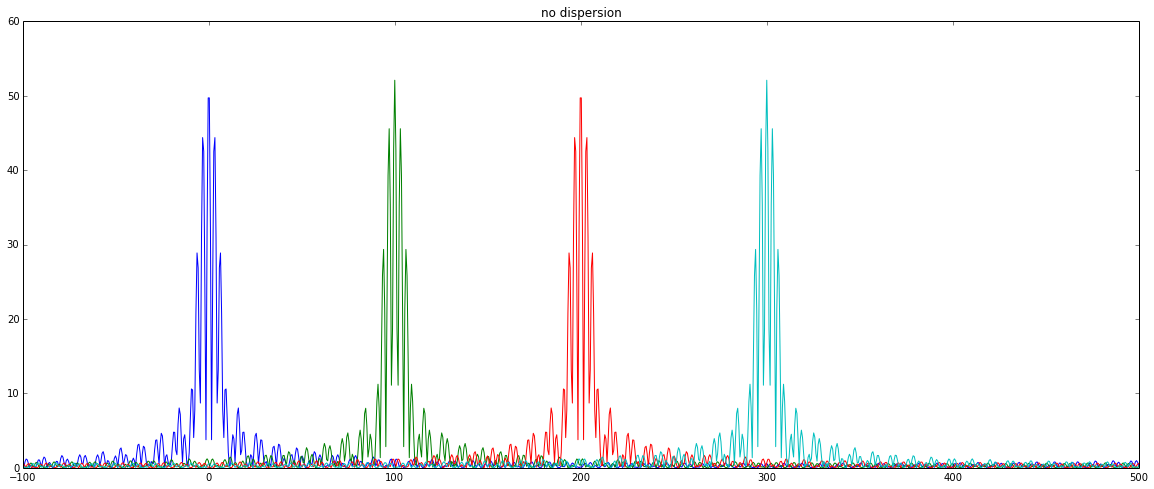

In [2]:
from __future__ import division
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from cmath import exp, pi, phase, cos, sin
plt.rcParams['figure.figsize'] = (20.0, 8.0)

def phi(x,t,d):
    m_range = 30
    k_0 = 1.0
    sigma_k = k_0 / 10.0
    delta_k = sigma_k / 10.0
    c = 1
    
    def omega(k): return c*k + d*k**3
    
    def harmonic(A, k, omega): return A * cos(k*x - omega*t)
    
    def mth_harmonic(m):
        k_m = k_0 + m * delta_k
        
        A = exp(-(m * delta_k)**2.0 / (2.0*sigma_k))
        
        return harmonic(A, k_m, omega(k_m))
    return abs(sum(mth_harmonic(m) for m in range(-m_range, m_range)))

X = np.linspace(-100, 500, 1000)

plt.title("no dispersion")
for t in [0, 100, 200, 300]:
    plt.plot(X, [phi(x, t, 0) for x in X])

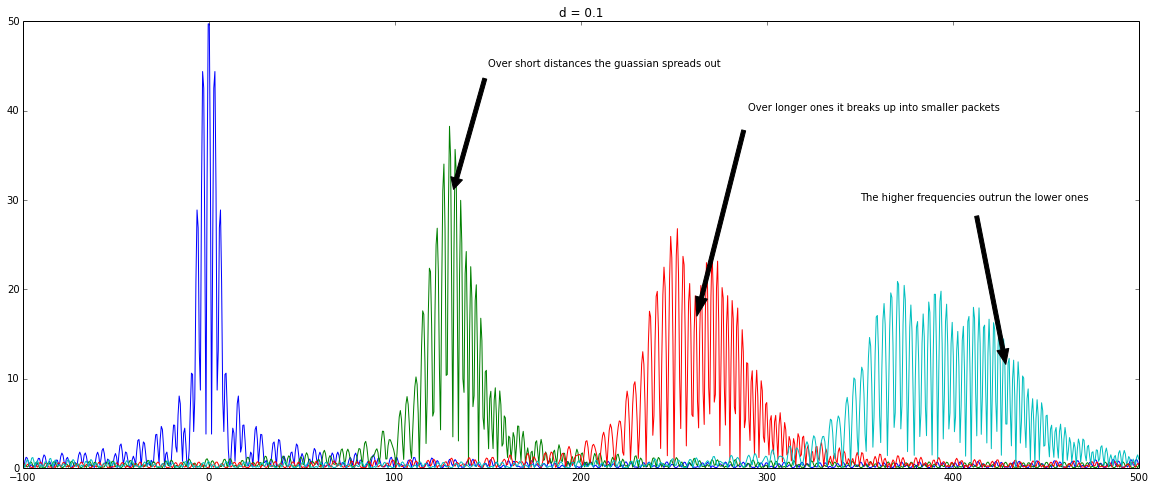

In [3]:
plt.title("d = 0.1")
for t in [0, 100, 200, 300]:
    plt.plot(X, [phi(x, t, 0.1) for x in X])

_ = plt.annotate('Over short distances the guassian spreads out', xy=(130, 30), xytext=(150, 45),
            arrowprops=dict(facecolor='black', shrink=0.08),
            )

_ = plt.annotate('Over longer ones it breaks up into smaller packets', xy=(260, 15), xytext=(290, 40),
            arrowprops=dict(facecolor='black', shrink=0.08),
            )  
    
_ = plt.annotate('The higher frequencies outrun the lower ones', xy=(430, 10), xytext=(350, 30),
            arrowprops=dict(facecolor='black', shrink=0.08),
            )

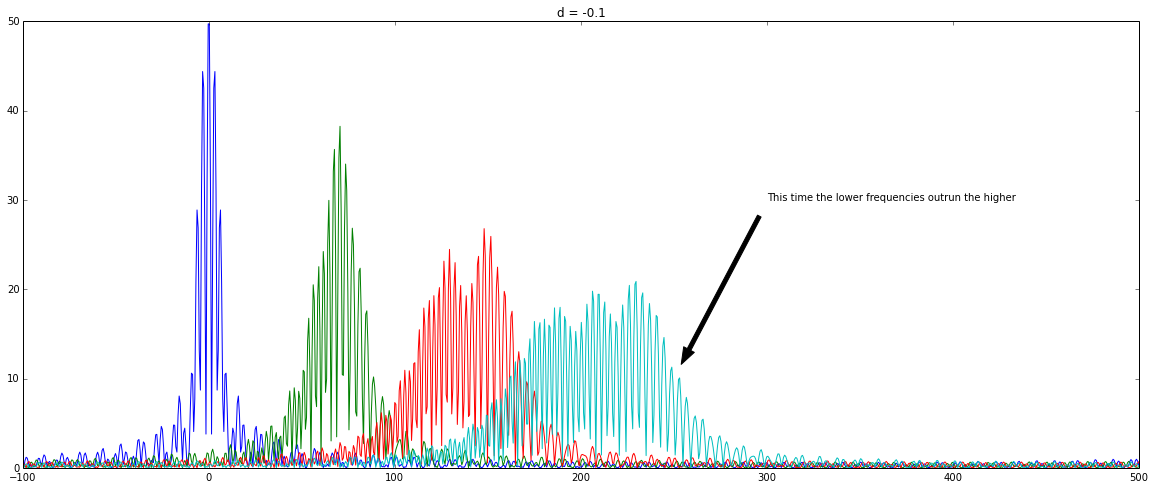

In [4]:
plt.title("d = -0.1")
for t in [0, 100, 200, 300]:
    plt.plot(X, [phi(x, t, -0.1) for x in X])
    
    
_ = plt.annotate('This time the lower frequencies outrun the higher', xy=(250, 10), xytext=(300, 30),
            arrowprops=dict(facecolor='black', shrink=0.08),
            )

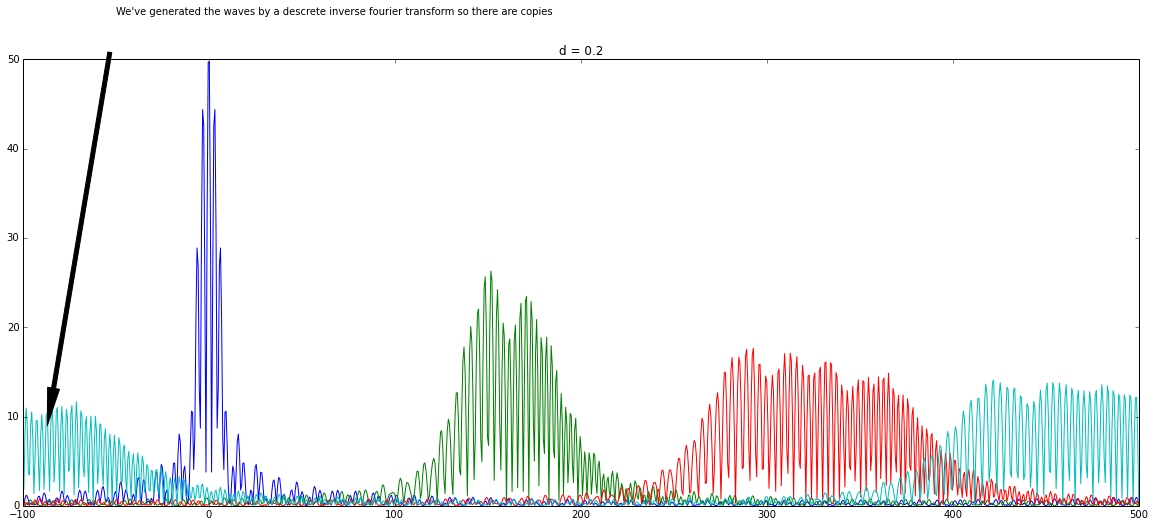

In [5]:
plt.title("d = 0.2")
for t in [0, 100, 200, 300]:
    plt.plot(X, [phi(x, t, 0.2) for x in X])
    
_ = plt.annotate('We\'ve generated the waves by a descrete inverse fourier transform so there are copies',
            xy=(-90, 5), xytext=(-50, 55),
            arrowprops=dict(facecolor='black', shrink=0.08),
            )

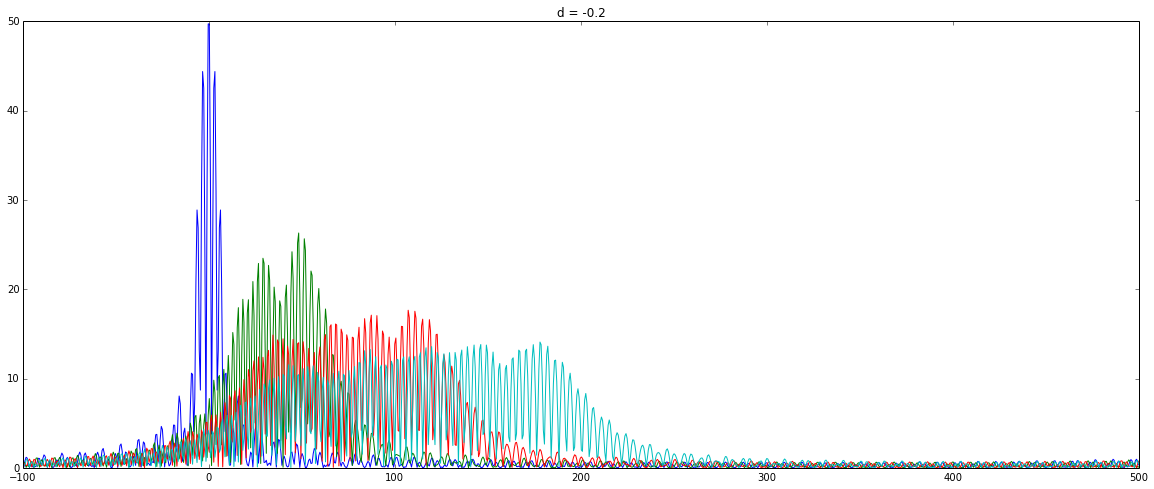

In [6]:
plt.title("d = -0.2")
for t in [0, 100, 200, 300]:
    plt.plot(X, [phi(x, t, -0.2) for x in X])

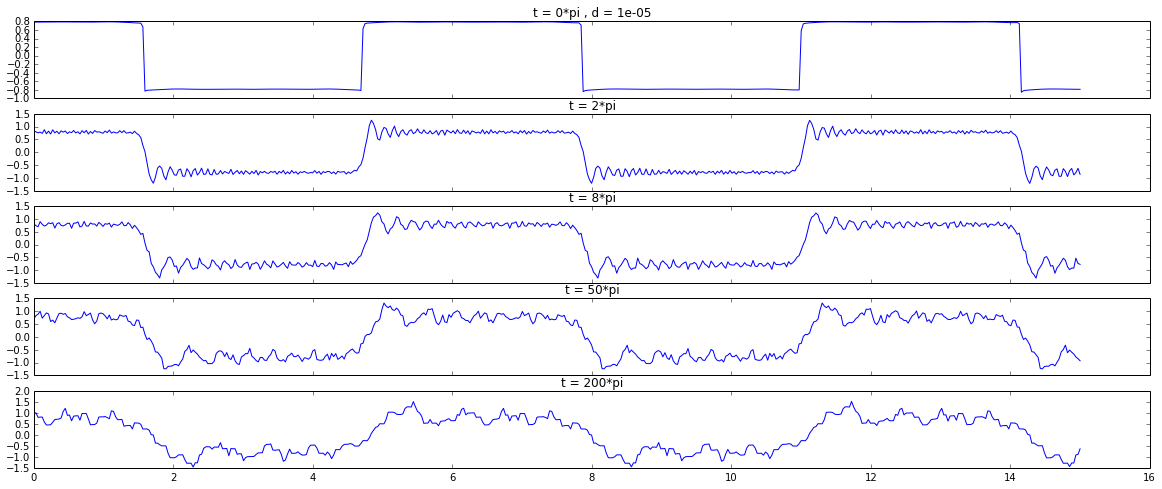

In [9]:
def phi_square(x,t,d):
    m_range = 100
    k_0 = 1.0
    c = 1
    
    def omega(k): return c*k + d*k**3
    
    def harmonic(A, k, omega): return A * cos(k*x - omega*t)
    
    def mth_harmonic(m):
        k_m = (2*m + 1) * k_0
        A = (-1.0)**m / (2.0*m + 1.0)
        
        return harmonic(A, k_m, omega(k_m))
    return sum(mth_harmonic(m) for m in range(0, m_range)).real

X = np.linspace(0, 15, 500)
times = [0, 2, 8, 50, 200]

def plot_multiple(d):
    f, axes = plt.subplots(len(times), sharex='col')
    for i,t in enumerate(times):
        axes[i].set_title("t = {}*pi {}".format(t, (", d = " + str(d)) if i == 0 else ""))
        Y = [phi_square(x, t*pi, d) for x in X]
        axes[i].plot(X, Y)

plot_multiple(0.00001)

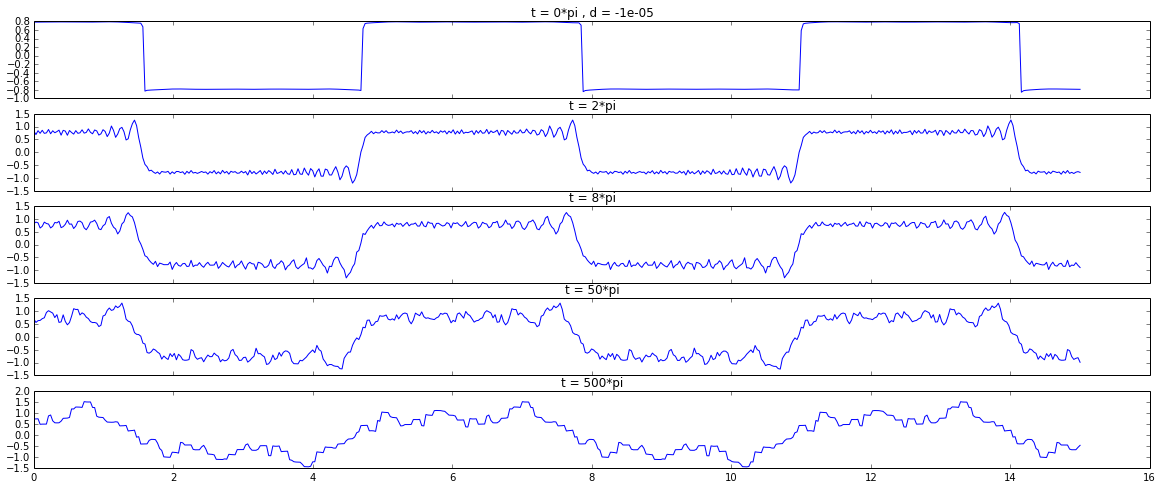

In [8]:
plot_multiple(-0.00001)